<a href="https://colab.research.google.com/github/DivySuhagiya/MachineLearning/blob/main/Heart_Disease_Prediction/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

1. load dataset and scanning

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.shape

(1190, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
# df.describe()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


2. Filtering missing value

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
df['resting bp s'].replace(0, df['resting bp s'].median(), inplace=True)
df['cholesterol'].replace(0, df['cholesterol'].median(), inplace=True)

<ipython-input-82-6d78c926490f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['resting bp s'].replace(0, df['resting bp s'].median(), inplace=True)
<ipython-input-82-6d78c926490f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.263025,17.964330,80.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,243.463025,53.275470,85.0,214.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


**3. Univarate Analysis**


3.1   Age distribution



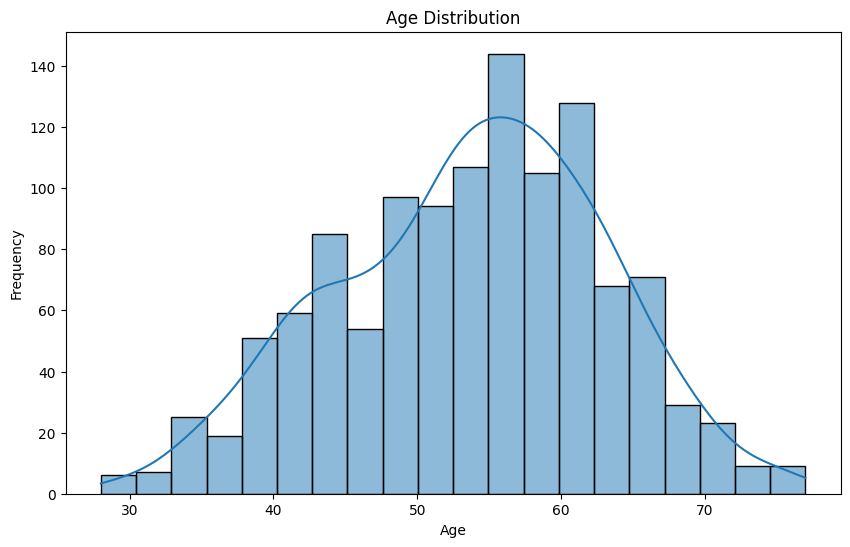

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

3.2 Gender Distribution

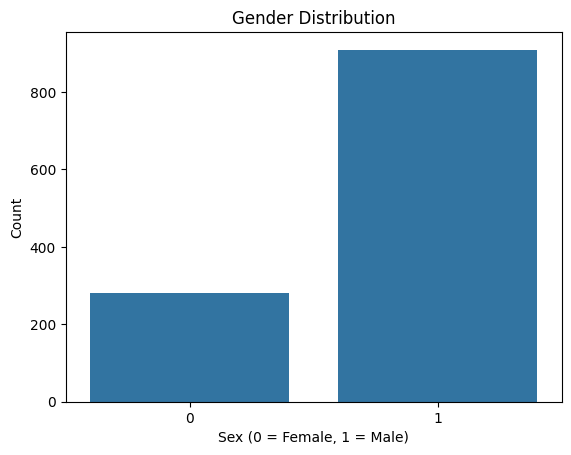

In [ ]:
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

3.3 Chest Pain Types

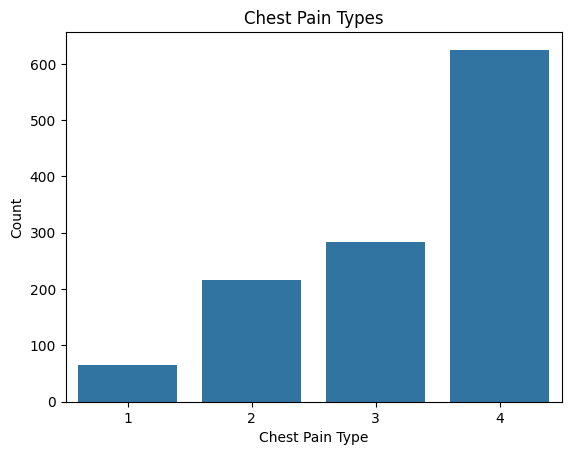

In [ ]:
sns.countplot(x='chest pain type', data=df)
plt.title('Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

**4.Bivarate Analysis**

4.1 Age Group vs Target

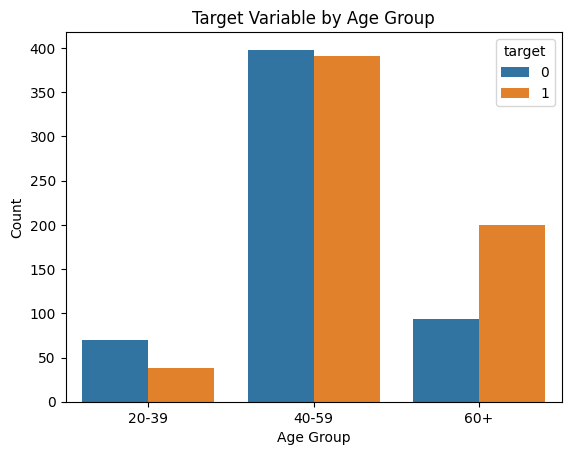

In [ ]:
# Create age groups
bins = [20, 40, 60, 80]
labels = ['20-39', '40-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

sns.countplot(x='age_group', hue='target', data=df)
plt.title('Target Variable by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
df["age_group"].value_counts()

,count
age_group,
40-59,789
60+,293
20-39,108


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])
df['age_group'].value_counts()

,count
age_group,
1,789
2,293
0,108


In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group
0,40,1,2,140,289,0,0,172,0,0.0,1,0,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0,1


4.2 Sex vs Target

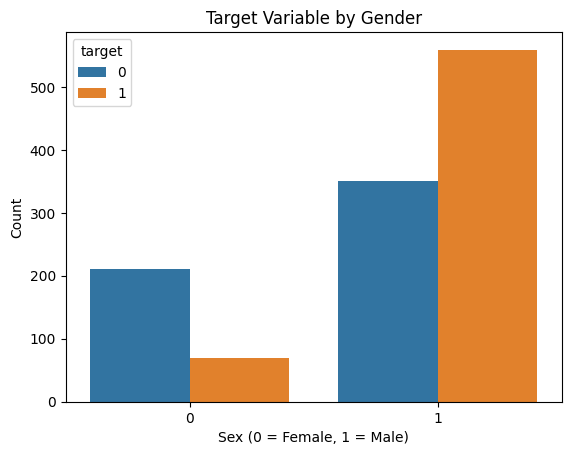

In [ ]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Target Variable by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

4.3 Chest Pain Type vs Target

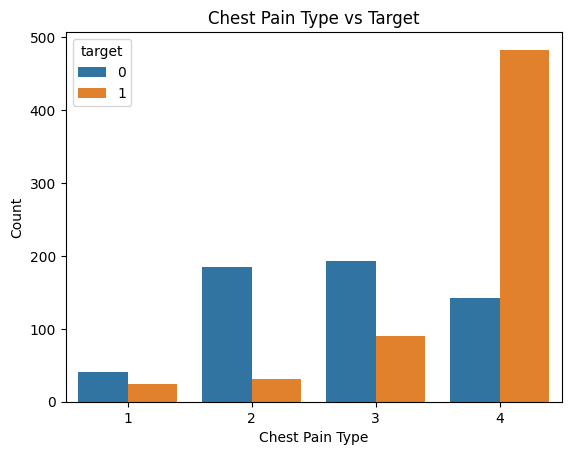

In [ ]:
sns.countplot(x='chest pain type', hue='target', data=df)
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

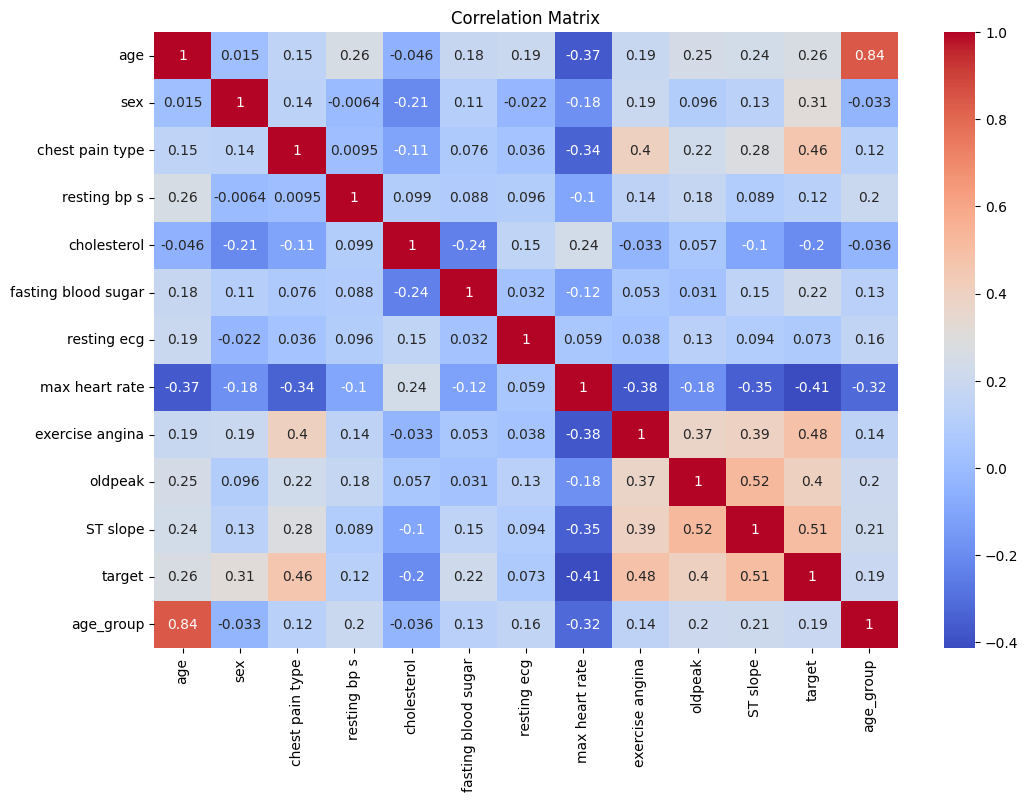

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

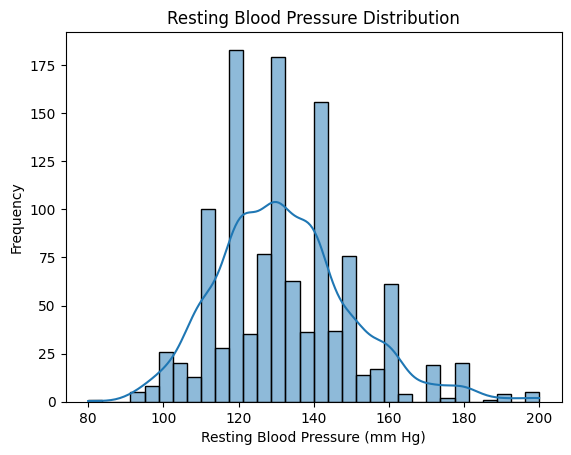

In [ ]:
sns.histplot(df['resting bp s'], kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

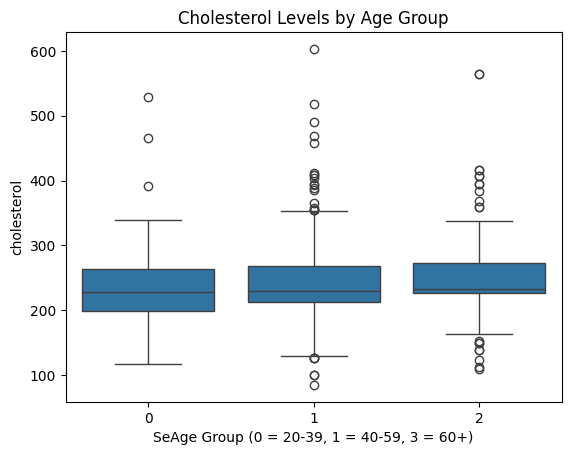

In [ ]:
sns.boxplot(x='age_group', y='cholesterol', data=df)
plt.xlabel('SeAge Group (0 = 20-39, 1 = 40-59, 3 = 60+)')
plt.title('Cholesterol Levels by Age Group')
plt.show()

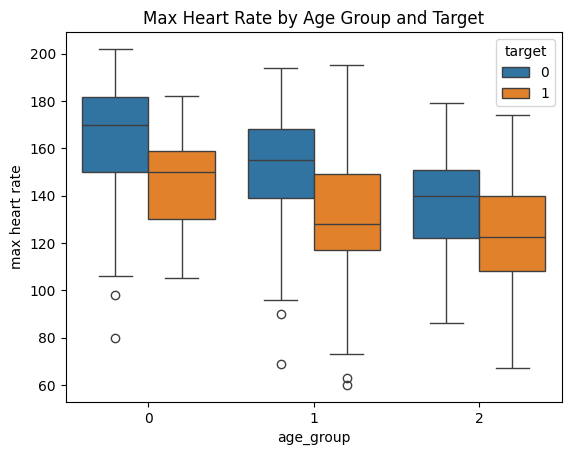

In [ ]:
sns.boxplot(x='age_group', y='max heart rate', hue='target', data=df)
plt.title('Max Heart Rate by Age Group and Target')
plt.show()

In [ ]:
# Define the cholesterol groups
bins = [0, 200, 240, float('inf')]  # Defining the bins for normal, borderline high, and high
labels = ['Normal', 'Borderline High', 'High']

# Create a new column for cholesterol groups
df['cholesterol_group'] = pd.cut(df['cholesterol'], bins=bins, labels=labels)

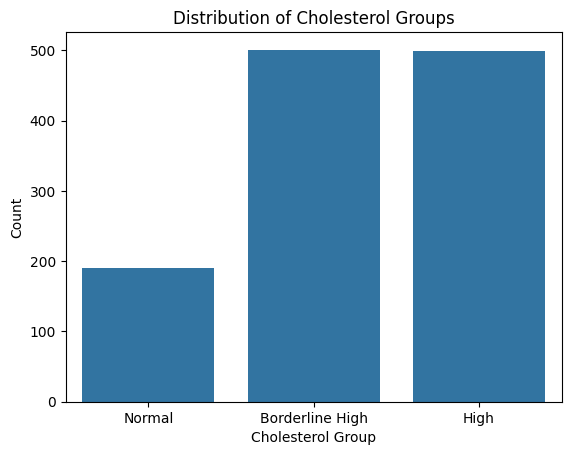

In [ ]:
sns.countplot(x='cholesterol_group', data=df)
plt.title('Distribution of Cholesterol Groups')
plt.xlabel('Cholesterol Group')
plt.ylabel('Count')
plt.show()

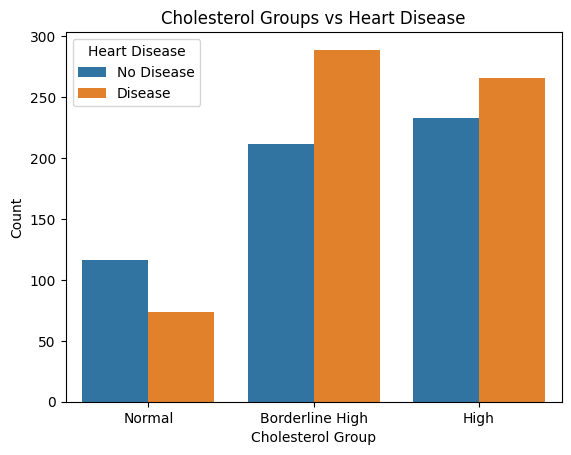

In [ ]:
sns.countplot(x='cholesterol_group', hue='target', data=df)
plt.title('Cholesterol Groups vs Heart Disease')
plt.xlabel('Cholesterol Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

<ipython-input-33-f39805858113>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('cholesterol_group')['target'].value_counts(normalize=True).mul(100).reset_index(name='percentage')


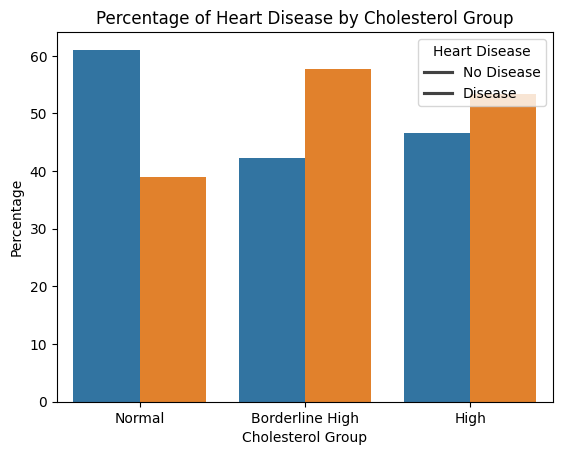

In [ ]:
# Calculate the percentage of heart disease within each cholesterol group
grouped = df.groupby('cholesterol_group')['target'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Plot the percentages
sns.barplot(x='cholesterol_group', y='percentage', hue='target', data=grouped)
plt.title('Percentage of Heart Disease by Cholesterol Group')
plt.xlabel('Cholesterol Group')
plt.ylabel('Percentage')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,age_group,cholesterol_group
0,40,1,2,140,289,0,0,172,0,0.0,1,0,0,1
1,49,0,3,160,180,0,0,156,0,1.0,2,1,1,2
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0,1
3,48,0,4,138,214,0,0,108,1,1.5,2,1,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0,1,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

X = df.drop(columns=['target'])
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (952, 11)
Testing set size: (238, 11)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_log_reg):.4f}")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Performance:
Accuracy: 0.8361
ROC-AUC: 0.9076
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       112
           1       0.83      0.87      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.83      0.84       238
weighted avg       0.84      0.84      0.84       238



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9244
ROC-AUC: 0.9762
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       112
           1       0.94      0.92      0.93       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
Accuracy: 0.9244
ROC-AUC: 0.9676
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       112
           1       0.94      0.91      0.93       126

    accuracy                           0.92       238
   macro avg       0.92      0.93      0.92       238
weighted avg       0.92      0.92      0.92       238



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)


# Evaluation
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
''' print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_svm):.4f}") '''
print(classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.8487
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       112
           1       0.84      0.88      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Train models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
results


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Logistic Regression': 0.8361344537815126,
 'Random Forest': 0.9327731092436975,
 'SVM': 0.8487394957983193,
 'XGBoost': 0.9243697478991597,
 'Neural Network': 0.8907563025210085}